In [1]:
import pandas as pd
df=pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp,result
0,41.0,41.00000,190.0,190.000000,7.4,67,0
1,36.0,36.00000,118.0,118.000000,8.0,72,0
2,12.0,12.00000,149.0,149.000000,12.6,74,0
3,18.0,18.00000,313.0,313.000000,11.5,62,0
4,NaN,42.12931,NaN,185.931507,14.3,56,1


In [2]:
df.columns

Index(['Unnamed: 0', 'Ozone', 'Unnamed: 2', 'Solar.R', 'Wind', 'Temp',
       'result'],
      dtype='object')

In [3]:
df.shape

(153, 7)

In [4]:
df.describe()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp,result
count,116.000000,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,42.129310,185.931507,185.931507,9.957516,77.882353,0.529412
std,32.987885,28.693372,90.058422,87.960267,3.523001,9.465270,0.500773
min,1.000000,1.000000,7.000000,7.000000,1.700000,56.000000,0.000000
25%,18.000000,21.000000,115.750000,120.000000,7.400000,72.000000,0.000000
50%,31.500000,42.129310,205.000000,194.000000,9.700000,79.000000,1.000000
75%,63.250000,46.000000,258.750000,256.000000,11.500000,85.000000,1.000000
max,168.000000,168.000000,334.000000,334.000000,20.700000,97.000000,1.000000


In [5]:
df.groupby('result').mean()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp
result,,,,,,
0,20.902778,20.902778,165.449275,166.302702,11.270833,72.652778
1,76.863636,60.997339,204.285714,203.379334,8.790123,82.530864


In [6]:
df['result'].value_counts()

1    81
0    72
Name: result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:부족, 1:정상)')

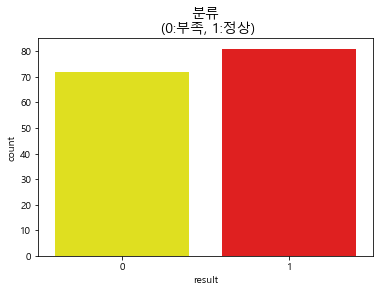

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

colors=["yellow","red"]
sns.countplot('result', data=df, palette=colors)
plt.title('분류\n (0:부족, 1:정상)',fontsize=14)

In [8]:
cols=['Solar.R','Wind','Temp']
X=df[cols]
y=df['result']

ValueError: 'c' argument has 153 elements, which is inconsistent with 'x' and 'y' with size 116.

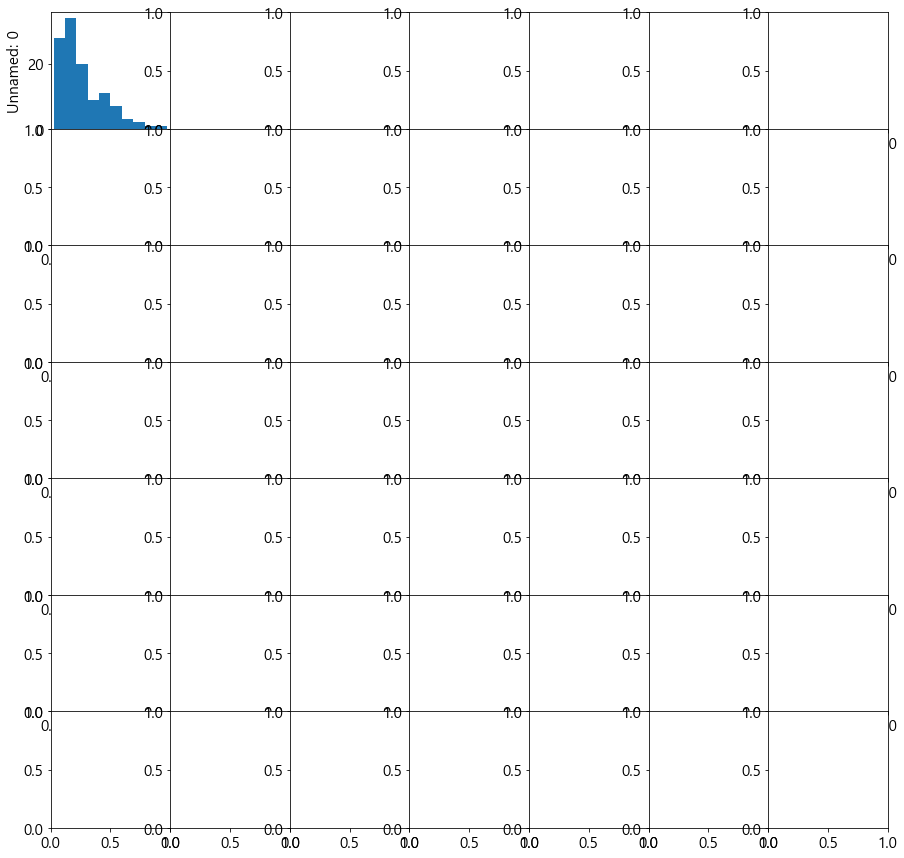

In [22]:
import mglearn 
pd.plotting.scatter_matrix(df, c=y,figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [11]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample,columns=cols)
y_samp = pd.DataFrame(data=y_sample,columns=['result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [12]:
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample,columns=cols)
y_samp = pd.DataFrame(data=y_sample,columns=['result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [13]:
df_samp['result'].value_counts()

0    81
1    81
Name: result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:부족, 1:정상)')

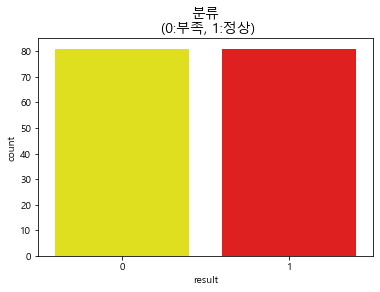

In [15]:
colors=["yellow","red"]
sns.countplot('result', data=df_samp, palette=colors)
plt.title('분류\n (0:부족, 1:정상)',fontsize=14)

In [16]:
cols=['Solar.R','Wind','Temp']
X=df[cols]
y=df['result']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y,
random_state=10)

Text(0.5, 0, 'number of clusters')

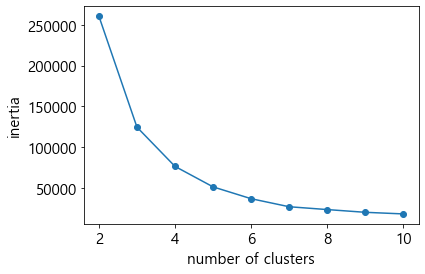

In [19]:
from sklearn.cluster import KMeans
clusters=range(2,11)
inertias=[]
for n in clusters:
    model=KMeans(n_clusters=n,random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_)
plt.rcParams["font.size"]=15
plt.plot(clusters, inertias, '-o')
plt.ylabel("inertia")
plt.xlabel("number of clusters")

In [23]:
model = KMeans(n_clusters=3,random_state=10)
print(model)
pred=model.fit_predict(X_train)
print(pred[:5])
pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[0 2 1 2 1]
[1 1 0 1 2]


In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test, pred)

0.5558953549067654

In [25]:
model = KMeans(n_clusters=2,random_state=10)
print(model)
pred=model.fit_predict(X_train)
print(pred[:5])
pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[0 1 1 1 1]
[1 1 0 1 1]


In [26]:
silhouette_score(X_test, pred)

0.6729790456272987

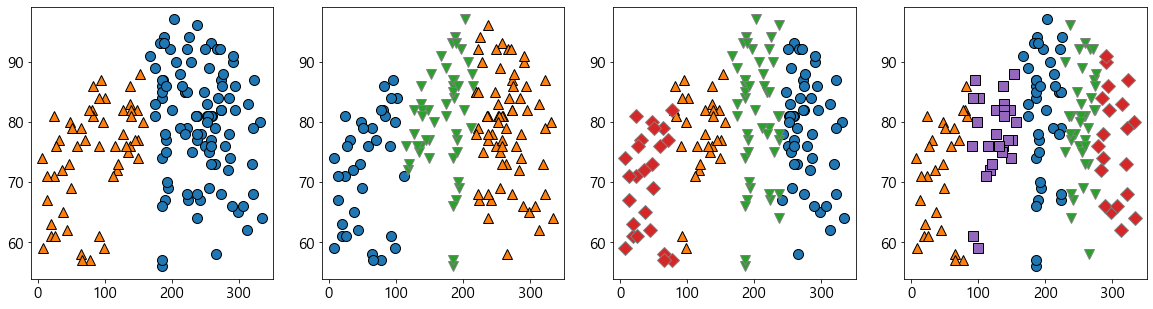

In [27]:
fig,axes=plt.subplots(1,4,figsize=(20,5))
idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Solar.R"], X["Temp"], lbls,ax=axes[idx])
    idx+=1

In [28]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
lbls=kmeans.labels_
lbls

array([1, 0, 0, 2, 1, 1, 2, 0, 3, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2,
       3, 0, 3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 3, 0, 0, 0, 3, 0, 2, 0, 0, 3, 0, 3, 0, 2, 2, 1, 0, 1,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 3, 2, 2, 2, 1, 1, 3, 2, 2, 2, 1, 3, 3,
       1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 3, 3, 3, 0,
       2, 1, 2, 3, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1,
       2, 1, 2, 1, 3, 0, 1, 1, 3, 1, 1, 1, 3, 0, 3, 3, 1, 0, 1, 0, 1])